<a href="https://colab.research.google.com/github/Vo-Linh/Project_AI/blob/main/FaceMask_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project detect FaseMask 😷
1. Load Data and prepare Data
2. Create and train model
3. Visualize model 
4. Imporve model



## 1. Load and pepare data
data from kaggle: https://www.kaggle.com/ahemateja19bec1025/facemask-dataset

Model run on TensorFlow framework

### 1. Load data

In [ ]:
# up load kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"linhvo67","key":"f3aff670b32c9fda225f1366896a88a9"}'}

In [ ]:
# Dowload data from kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/ 
!ls ~/.kaggle 
!chmod 600 /root/.kaggle/kaggle.json 
!kaggle datasets download -d ahemateja19bec1025/facemask-dataset

kaggle.json
 85% 43.0M/50.4M [00:00<00:00, 82.7MB/s]
100% 50.4M/50.4M [00:00<00:00, 145MB/s] 


In [ ]:
# unzip data
!unzip "/content/facemask-dataset.zip"

Archive:  /content/facemask-dataset.zip
  inflating: dataset/dataset/0/0.jpg  
  inflating: dataset/dataset/0/1.jpg  
  inflating: dataset/dataset/0/10.jpg  
  inflating: dataset/dataset/0/100.jpg  
  inflating: dataset/dataset/0/101.jpg  
  inflating: dataset/dataset/0/102.jpg  
  inflating: dataset/dataset/0/104.jpg  
  inflating: dataset/dataset/0/105.jpg  
  inflating: dataset/dataset/0/106.jpg  
  inflating: dataset/dataset/0/107.jpg  
  inflating: dataset/dataset/0/108.jpg  
  inflating: dataset/dataset/0/109.jpg  
  inflating: dataset/dataset/0/11.jpg  
  inflating: dataset/dataset/0/110.jpg  
  inflating: dataset/dataset/0/111.jpg  
  inflating: dataset/dataset/0/112.jpg  
  inflating: dataset/dataset/0/114.jpg  
  inflating: dataset/dataset/0/115.jpg  
  inflating: dataset/dataset/0/116.jpg  
  inflating: dataset/dataset/0/117.jpg  
  inflating: dataset/dataset/0/118.jpg  
  inflating: dataset/dataset/0/119.jpg  
  inflating: dataset/dataset/0/12.jpg  
  inflating: dataset/dat

### Visualize data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def load_and_prepare_img(filename, img_shape = 224, scale = True):
    """
    Read in images doem filename and turns it into a tensor and reshapes into
    ------------
    filename (str): strings filename of target image
    img_shape (int): shape of image, default 224
    scale (boolen): whether to scale pixel values to range(0, 1), default True
    """
    # read img 
    img = tf.io.read_file(filename= filename)

    # Decode img
    img = tf.io.decode_image(img, dtype= tf.float32)

    # Resize image
    img = tf.image.resize(img, size = (img_shape, img_shape))

    # Scale Yes/No
    if scale == True:
        img = img/255
    return img 

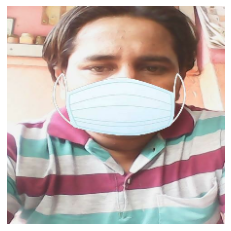

In [ ]:
import random, os

# Visulize random data have mask
img_path = '/content/dataset/dataset/1/' + random.choice(os.listdir('/content/dataset/dataset/1'))
img = load_and_prepare_img(filename = img_path, scale=False)
plt.imshow(img);
plt.axis(False);

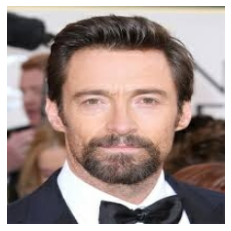

In [ ]:
# Visulize random data don't mask
img_path = '/content/dataset/dataset/0/' + random.choice(os.listdir('/content/dataset/dataset/0'))
img = load_and_prepare_img(filename = img_path, scale=False)
plt.imshow(img);
plt.axis(False);

In [ ]:
main_path = "/content/dataset/dataset"

CLASSES = os.listdir(main_path)
CLASSES = ['Have mask' if i == '1' else 'Do not mask' for i in CLASSES]
NUM_CLASS = 2
BATCH_SIZE = 32
SPLIT = 0.2
IMG_SHAPE = 224

In [ ]:
# Create datagen
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range= 0.2,
                                                          shear_range = 0.2,
                                                          rotation_range = 10,
                                                          horizontal_flip = True,
                                                          validation_split = SPLIT,
                                                          rescale = 1./255 )
# Create train data
train_data = datagen.flow_from_directory(directory= main_path,
                                         target_size = (IMG_SHAPE, IMG_SHAPE),
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset = "training",)
# Create test data
val_data = datagen.flow_from_directory(directory= main_path,
                                         target_size = (IMG_SHAPE, IMG_SHAPE),
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset = "validation",)

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


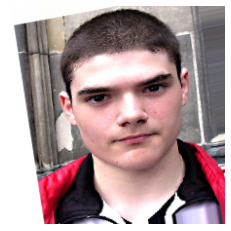

In [ ]:
plt.imshow(val_data[0][0][21]);
plt.axis(False);

## Create model 

Use model VIT train model from tf hub
https://tfhub.dev/sayakpaul/vit_s16_classification/1

In [ ]:
import tensorflow_hub as hub

In [ ]:
# Create base model
vit_s16 = 'https://tfhub.dev/sayakpaul/vit_s16_classification/1'

# Create model by Functional API
inputs = tf.keras.Input(shape = (224, 224, 3), name= "input_layer")
vit_s16 = hub.KerasLayer(vit_s16, trainable= True, input_shape = (IMG_SHAPE, IMG_SHAPE, 3))(inputs)
x = tf.keras.layers.Flatten()(vit_s16)
x = tf.keras.layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(NUM_CLASS ,activation="sigmoid", dtype='float32')(x)
model = tf.keras.Model(inputs, outputs)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer_9 (KerasLayer)  (None, 1000)              22050664  
                                                                 
 flatten_3 (Flatten)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 8)                 8008      
                                                                 
 dense_6 (Dense)             (None, 2)                 18        
                                                                 
Total params: 22,058,690
Trainable params: 8,026
Non-trainable params: 22,050,664
_________________________________________________________________


In [ ]:
# Compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Fit model
history = model.fit(x = train_data, epochs= 3,
                    validation_data = val_data,
                    callbacks = tf.keras.callbacks.EarlyStopping(patience=3))

Epoch 1/60
35/35 [==============================] - 327s 9s/step - loss: 0.2131 - accuracy: 0.9083 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 2/60
35/35 [==============================] - 259s 7s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/60
35/35 [==============================] - 260s 7s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/60
35/35 [==============================] - 259s 7s/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/60
35/35 [==============================] - 259s 7s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/60
35/35 [==============================] - 258s 7s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/60
35/35 [==============================] - ETA: 0s - loss: 7.0258e-04 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
# Create model with VGG16
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=[IMG_SHAPE,IMG_SHAPE, 3])
        
x = vgg16.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(128) (x)
x = tf.keras.layers.LeakyReLU(alpha=0.2) (x)
x = tf.keras.layers.GaussianDropout(0.4) (x)
outputs = tf.keras.layers.Dense(NUM_CLASS,activation="sigmoid", dtype='float32')(x)
    
model = tf.keras.Model(vgg16.input, outputs)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Compile model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Fit model
history = model.fit(x = train_data, epochs= 10,
                    validation_data = val_data,
                    callbacks = tf.keras.callbacks.EarlyStopping(patience=3))

Epoch 1/10
35/35 [==============================] - 2184s 62s/step - loss: 0.8470 - accuracy: 0.4832 - val_loss: 0.6933 - val_accuracy: 0.4982
Epoch 2/10
35/35 [==============================] - 2167s 62s/step - loss: 0.6934 - accuracy: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 3/10
35/35 [==============================] - 2156s 62s/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 4/10
11/35 [========>.....................] - ETA: 23:17 - loss: 0.6933 - accuracy: 0.4858